# Plotting trajectory of resulting IDs

In [8]:
install.packages(c("maps", "feather", "ggplot2"))

Installing packages into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
unloadNamespace('data.table')
unloadNamespace('reshape2')
unloadNamespace('plyr')
install.packages("data.table", type="source", dependencies=TRUE)

In [9]:
suppressMessages({
    library(tidyverse)
    library(maps)
    library(scales)
    library(stringr)
    library(data.table)
    library(feather)
    library(parallel)
    library(ggplot2)
    source("preprocess_utils.R")
})

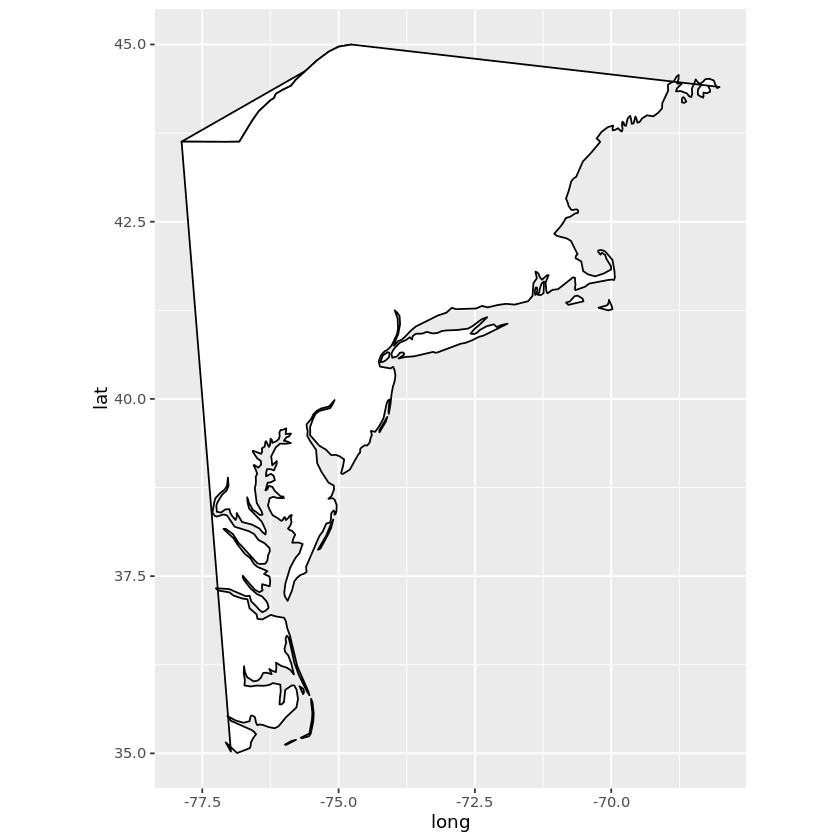

In [2]:
# Let us get a world map using the "map_data" function 
world <- map_data("world")

world <- map_data("world")
a_region <- filter(world, long > -78 & long < -68 & lat > 35 & lat < 45)

ggplot() +
  geom_polygon(data = a_region,
               mapping = aes(x = long, y = lat, group = group),
               fill = "white", color = "black") +
  coord_fixed(1.3)

In [3]:
ac_data <- read_feather("full_ac_data.feather")
jfk_data <- read_feather("full_jfk_data.feather")

In [4]:
summary1 <- ac_data %>% group_by(id) %>% summarize(V1=length(unique(V10)))
table(summary1$V1)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2528 1776 1541 1134  692  471  361  282  295  306  317  327  364  346  355  389 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 372  368  383  374  372  361  389  362  360  347  362  315  336  307  334  296 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
 315  270  287  249  216  218  207  185  155  136  132   99  122  100   95   68 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  73   61   50   38   53   23   39   20   30   17   13   10   12   12    7    7 
  65   66   67   68   69   70   71   72   73   76   78   79   80   82   83   84 
   6    6    2    5    4    2    1    2    4    1    3    1    1    1    2    1 
  87   90   93 
   1    1    1 

For some IDs there are 93 distinct call-signs?

In [5]:
summary1[summary1$V1 > 1, ]

id,V1
<chr>,<int>
01012A_0,34
01012A_1,2
01012A_2,21
01013D_0,5
01013D_1,16
0101E0_0,72
0101E0_1,3
0101E0_2,31
0200CA_0,78


In [6]:
summary2 <- ac_data %>% group_by(V10) %>% summarize(V1 = length(unique(id)))
table(summary2$V1)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
  89   44   49   27   36   22   36   31   28   25   21   22   23   24   11   15 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  16   21   17   12   19    8   17   14   14   16   14   12    4   17    8    7 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   5    7   15   11    8   14   13    7    9    6   10    6    7    6    3    5 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   5    6    7    7    5   10    5    8    1   11   13    8    5    5    5    4 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   3    5    5    7    6    5    4    5    4    3    6    6    3    3    3    3 
  81   83   84   85   86   87   88   89   90   91   92   93   94   95   96   98 
   6    5    2    3    4    7    5    1    3    2    1    4    3    5    2    1 
  99  100  101  102  103  1

This also looks odd because some call-signs have 6000+ unique IDs in the data set?

In [7]:
summary2[summary2$V1 > 1, ]

V10,V1
<chr>,<int>
F-7NC21,2353
F-CYBN2,3
F-CYCK3,40
F-CYFC3,6
F-CYFC6,238
F-CYGK2,713
F-CYGK3,145
F-CYHU2,128
F-CYID2,111


unique(ac_data$V16)

unique(ac_data$V19)

unique(ac_data$V10)

In [10]:
plotting <- T

if(plotting) {
  dir.create("jfk_landing", showWarnings = F)
  setwd("jfk_landing")
  visualize_map <- function(ac_df, a_region, color_var = "id", sampl = T,
                            min_lon = NULL, max_lon = NULL, min_lat = NULL, max_lat = NULL) {
    ac_df$num_id <- as.integer(as.factor(ac_df$id))
    ac_df <- split(ac_df, ac_df$num_id)
    if(sampl)
      ac_df <- ac_df[sample(x = 1:length(ac_df), size = n_aircraft, replace = F)]
    
    ac_df <- do.call(rbind, ac_df)
    ac_df <- ac_df[order(ac_df$ts), ]
    p <- ggplot() +
      geom_polygon(data = a_region,
                   mapping = aes(x = long, y = lat, group = group),
                   fill = "white", color = "black") +
      coord_fixed(1.3) +
      geom_path(data = ac_df, arrow = arrow(type = "closed", angle = 18,
                                            length = unit(0.1, "inches")),
                aes(x = lon, y = lat, frame = ts, color = id)) +
      xlim(c(min_lon, max_lon)) +
      ylim(c(min_lat, max_lat))
    return(p)
  }
  
  min_lon <- min(jfk_data$lon)
  max_lon <- max(jfk_data$lon)
  min_lat <- min(jfk_data$lat)
  max_lat <- max(jfk_data$lat)
  uniq_id <- unique(jfk_data$aircraft)
  
  # library(rnaturalearth)
  cores <- detectCores() - 1
  cl <- parallel::makeCluster(cores)
  split_num <- ceiling(length(uniq_id)/cores)
  num_id <- ceiling((1:length(uniq_id))/split_num)
  id_splits <- split(uniq_id, num_id)
  jfk_data1 <- jfk_data[, c("id", "ts", "lon", "lat", "aircraft")]
  # world <- ne_countries(scale = "medium", returnclass = "sf")
  clusterExport(cl, list("jfk_data1", "coord_sf", "geom_sf", "a_region", "visualize_map",
                         "min_lon", "max_lon", "min_lat", "max_lat", "png", "paste0", "coord_fixed",
                         "print", "dev.off", "ggplot", "geom_polygon", "geom_path", "arrow", "aes",
                         "unit", "xlim", "ylim"))
  
  plot_ids <- plot_aircraft_ids(jfk_data1, a_region, min_lon, min_lat, max_lon, max_lat)
  
  parLapply(cl, id_splits, plot_ids)
  stopCluster(cl)
  setwd("../")
}
table(ac_data$next_airport)


            ACK     ACY     ADW     ALB     APG     ART     BDL     BDR     BED 
5014946      79      13       9      40       1       3      71       3      56 
    BGR     BOS     BTV     BWI     CEF     DCA     ECG     EWN     EWR     FAF 
     36     461      58     272       2     361       1       5     522       1 
    FMH     FOK     HFD     HPN     IAD     ILG     ISP     JFK     LGA     MDT 
      1      16       1     103     366      11      20     524     491      34 
    MIV     MPV     NGU     OGS     ORF     PHF     PHL     PNE     PVD     PWM 
      1       1       9       3      75       1     345       7      45      48 
    RIC     ROC     SBY     SFZ     SWF     SYR     TEB     TTN     WRI     WWD 
     77      58       8       1       9      44     115      11       1       3 
    YGK     YTR 
      7       4 

# Interesting plots

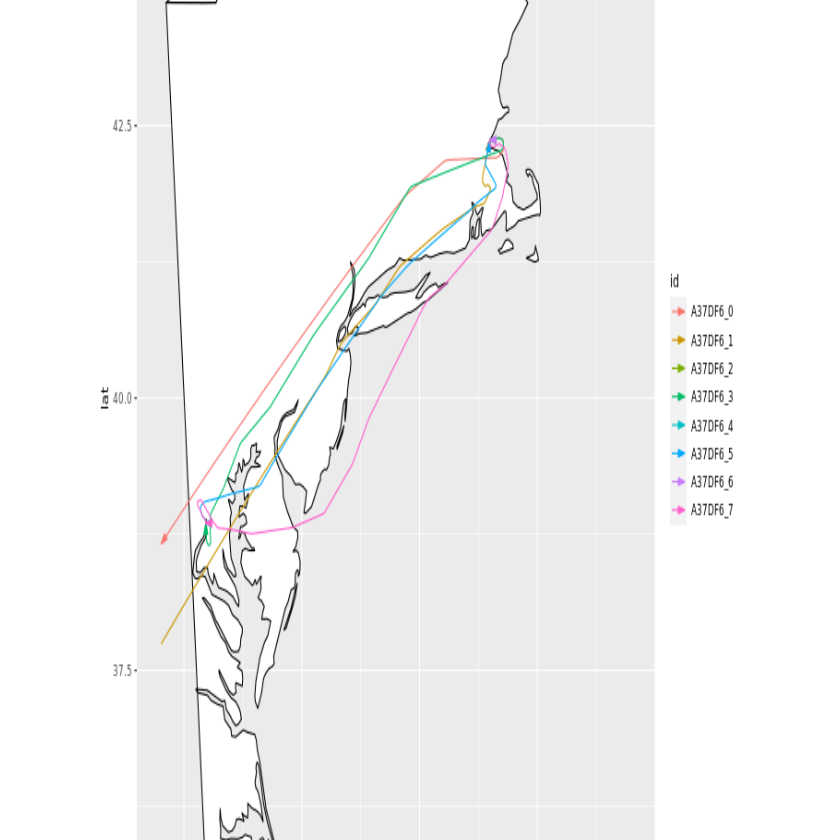

In [12]:
library(png)
img <- png::readPNG("jfk_landing/A37DF6.png")
grid::grid.raster(img, width = 1.5, height = 1.5)

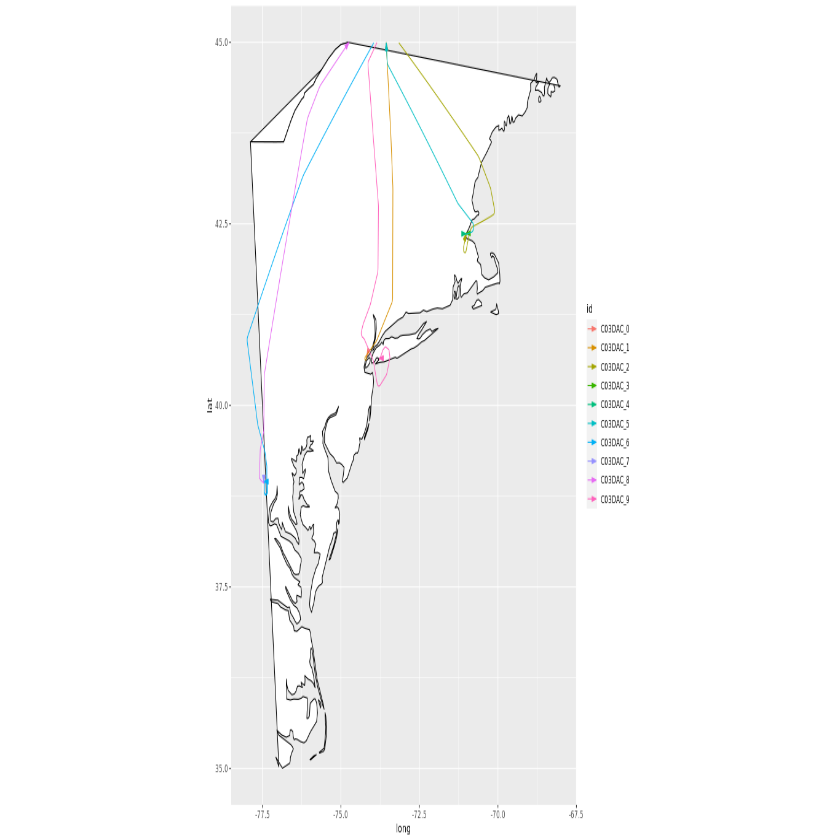

In [13]:
img <- png::readPNG("jfk_landing/C03DAC.png")
grid::grid.raster(img, width = 1, height = 1)